# M3 - WEEK 5 | PROJECT: Make your data shine!

Working on The Metropolitan Museum of Art Open Access.

# Step One : Warming up

Retrieving file

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Cheching running time
import time
start_time = time.time()


In [67]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd


#url = 'https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv'

# Save file
#urlretrieve(url, 'MetObjects.csv')

# Read file into a DataFrame and print its head
df_chunk = pd.read_csv('MetObjects.csv', sep=',', chunksize= 10000 )
dfz = pd.concat(df_chunk)
print("--- %s seconds ---" % (time.time() - start_time))

--- 112.81488609313965 seconds ---


In [68]:
#dfz.to_pickle('metropolianmusumart.pkl')

In [69]:
#dfg=pd.read_pickle('metropolianmusumart.pkl')

In [70]:
dfz.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository,Tags
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN


In [71]:
dfz.shape

(495103, 44)

In [72]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495103 entries, 0 to 495102
Data columns (total 44 columns):
Object Number              495103 non-null object
Is Highlight               495103 non-null bool
Is Public Domain           495103 non-null bool
Object ID                  495103 non-null int64
Department                 495103 non-null object
Object Name                490694 non-null object
Title                      463839 non-null object
Culture                    209073 non-null object
Period                     89558 non-null object
Dynasty                    23281 non-null object
Reign                      11206 non-null object
Portfolio                  22306 non-null object
Artist Role                285873 non-null object
Artist Prefix              98608 non-null object
Artist Display Name        287970 non-null object
Artist Display Bio         238338 non-null object
Artist Suffix              12261 non-null object
Artist Alpha Sort          287935 non-null object


In [73]:
dfz.describe()

,Object ID,Object Begin Date,Object End Date
count,495103.000000,495103.000000,495103.000000
mean,387463.309287,1313.109971,1410.841556
std,232128.271870,1651.196129,1105.834773
min,1.000000,-400000.000000,-240000.000000
25%,213611.500000,1540.000000,1598.000000
50%,375709.000000,1800.000000,1847.000000
75%,565729.500000,1900.000000,1911.000000
max,827099.000000,5000.000000,15335.000000


In [74]:
dfz.dtypes

Object Number              object
Is Highlight                 bool
Is Public Domain             bool
Object ID                   int64
Department                 object
Object Name                object
Title                      object
Culture                    object
Period                     object
Dynasty                    object
Reign                      object
Portfolio                  object
Artist Role                object
Artist Prefix              object
Artist Display Name        object
Artist Display Bio         object
Artist Suffix              object
Artist Alpha Sort          object
Artist Nationality         object
Artist Begin Date          object
Artist End Date            object
Object Date                object
Object Begin Date           int64
Object End Date             int64
Medium                     object
Dimensions                 object
Credit Line                object
Geography Type             object
City                       object
State         

In [75]:
#cheking missing value

missing_values_count = dfz.isnull().sum()* 100 / len(dfz)

# look at the missing points in the first ten columns
missing_values_count[:].sort_values()


Object Number               0.000000
Is Highlight                0.000000
Is Public Domain            0.000000
Object ID                   0.000000
Department                  0.000000
Metadata Date               0.000000
Link Resource               0.000000
Object End Date             0.000000
Object Begin Date           0.000000
Repository                  0.000000
Credit Line                 0.159563
Object Name                 0.890522
Medium                      1.534428
Object Date                 3.036944
Title                       6.314646
Classification             11.396215
Dimensions                 15.411945
Artist Display Name        41.836345
Artist Alpha Sort          41.843414
Artist Role                42.259893
Tags                       46.437812
Artist Begin Date          51.312555
Artist Display Bio         51.860926
Artist End Date            51.883951
Culture                    57.771817
Artist Nationality         60.935199
Artist Prefix              80.083336
P

In [76]:
#just double check the percentage of missing value in the whole dataset
total_cells = np.product(dfz.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.009970978727101289

In [77]:
#Drop any repetation by rows
duplicateRowsDF = dfz[dfz.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [Object Number, Is Highlight, Is Public Domain, Object ID, Department, Object Name, Title, Culture, Period, Dynasty, Reign, Portfolio, Artist Role, Artist Prefix, Artist Display Name, Artist Display Bio, Artist Suffix, Artist Alpha Sort, Artist Nationality, Artist Begin Date, Artist End Date, Object Date, Object Begin Date, Object End Date, Medium, Dimensions, Credit Line, Geography Type, City, State, County, Country, Region, Subregion, Locale, Locus, Excavation, River, Classification, Rights and Reproduction, Link Resource, Metadata Date, Repository, Tags]
Index: []

[0 rows x 44 columns]


In [78]:
df2=dfz.drop(['River','State','Locus','County','Reign','Artist Suffix','Locale','Excavation','Subregion','Portfolio','Dynasty',
              'Rights and Reproduction','Region','City','Geography Type','Country','Period'],axis=1)

In [79]:
df2.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Prefix,...,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Link Resource,Metadata Date,Repository,Tags
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,Maker,NaN,...,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Metal,http://www.metmuseum.org/art/collection/search/1,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,NaN,...,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",Metal,http://www.metmuseum.org/art/collection/search/2,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/3,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/4,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/5,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN


In [80]:
df2['Date']=pd.to_datetime(df2['Metadata Date'])


In [81]:
for col in ['Department', 'Object Name', 'Title', 'Culture', 'Artist Role', 'Artist Prefix', 'Artist Display Name', 
            'Artist Display Bio', 'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date', 'Artist End Date', 
            'Object Date', 'Medium', 'Dimensions', 'Credit Line', 'Classification',
            'Link Resource', 'Metadata Date', 'Repository', 'Tags']:
    df2[col] = df2[col].astype('category')
    
   # I am not sure about changing all column, we can discuss about it because some of them need another type

In [82]:
df2.nunique()

Object Number          492398
Is Highlight                2
Is Public Domain            2
Object ID              495103
Department                 19
Object Name             28372
Title                  252194
Culture                  7278
Artist Role              6365
Artist Prefix            5576
Artist Display Name     62218
Artist Display Bio      45915
Artist Alpha Sort       62222
Artist Nationality       3803
Artist Begin Date       24437
Artist End Date         24754
Object Date             32938
Object Begin Date        2129
Object End Date          2094
Medium                  65281
Dimensions             258092
Credit Line             39201
Classification           1235
Link Resource          495103
Metadata Date               1
Repository                  1
Tags                    51880
Date                        1
dtype: int64

In [83]:
#df2['Culture'].resample('A').first().interpolate('linear') 

In [84]:
# Check whether there are categorical columns and columns with only 1 value (columns with 1 value don't add value)
for col in ['Department', 'Object Name', 'Title', 'Culture', 'Artist Role', 'Artist Prefix', 'Artist Display Name', 
            'Artist Display Bio', 'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date', 'Artist End Date', 
            'Object Date', 'Medium', 'Dimensions', 'Credit Line', 'Classification',
            'Link Resource', 'Metadata Date', 'Repository', 'Tags']:
    result = len(df2[col].value_counts())
    print(col+" : "+str(result))

Department : 19
Object Name : 28372
Title : 252194
Culture : 7278
Artist Role : 6365
Artist Prefix : 5576
Artist Display Name : 62218
Artist Display Bio : 45915
Artist Alpha Sort : 62222
Artist Nationality : 3803
Artist Begin Date : 24437
Artist End Date : 24754
Object Date : 32938
Medium : 65281
Dimensions : 258092
Credit Line : 39201
Classification : 1235
Link Resource : 495103
Metadata Date : 1
Repository : 1
Tags : 51880


In [85]:
# Rename a column to make them more descriptive
df2.rename({"Repository": "Repository Location"}, axis=1, inplace=True)

In [86]:
# Replace the "Dimensions unavailable" in the Dimensions column
df3 = df2.replace("Dimensions unavailable", np.NaN)
df3.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Prefix,...,Object End Date,Medium,Dimensions,Credit Line,Classification,Link Resource,Metadata Date,Repository Location,Tags,Date
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,Maker,NaN,...,1853,Gold,NaN,"Gift of Heinz L. Stoppelmann, 1979",Metal,http://www.metmuseum.org/art/collection/search/1,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,NaN,...,1901,Gold,NaN,"Gift of Heinz L. Stoppelmann, 1980",Metal,http://www.metmuseum.org/art/collection/search/2,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/3,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/4,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/5,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01


In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495103 entries, 0 to 495102
Data columns (total 28 columns):
Object Number          495103 non-null object
Is Highlight           495103 non-null bool
Is Public Domain       495103 non-null bool
Object ID              495103 non-null int64
Department             495103 non-null category
Object Name            490694 non-null category
Title                  463839 non-null category
Culture                209073 non-null category
Artist Role            285873 non-null category
Artist Prefix          98608 non-null category
Artist Display Name    287970 non-null category
Artist Display Bio     238338 non-null category
Artist Alpha Sort      287935 non-null category
Artist Nationality     193411 non-null category
Artist Begin Date      241053 non-null category
Artist End Date        238224 non-null category
Object Date            480067 non-null category
Object Begin Date      495103 non-null int64
Object End Date        495103 non-null int

In [88]:
df3["Dimensions_cm"] = df3["Dimensions"].str.split(pat = ")",n=1,expand=True).iloc[:,0]

In [89]:
df3["Dimensions_cm"] = df3["Dimensions"].str.split(pat = "(",n=1,expand=True).iloc[:,1]

In [90]:
df3.head(50)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Prefix,...,Medium,Dimensions,Credit Line,Classification,Link Resource,Metadata Date,Repository Location,Tags,Date,Dimensions_cm
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,Maker,NaN,...,Gold,NaN,"Gift of Heinz L. Stoppelmann, 1979",Metal,http://www.metmuseum.org/art/collection/search/1,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,NaN
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,NaN,...,Gold,NaN,"Gift of Heinz L. Stoppelmann, 1980",Metal,http://www.metmuseum.org/art/collection/search/2,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,NaN
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/3,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,1.7 cm)
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/4,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,1.7 cm)
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/5,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,1.7 cm)
5,67.265.12,False,False,6,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/6,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,1.7 cm)
6,67.265.13,False,False,7,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/7,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Birds|Coins,2019-05-27 08:00:01,1.7 cm)
7,67.265.14,False,False,8,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/8,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Inscriptions|Men|Profiles|Coins,2019-05-27 08:00:01,1.7 cm)
8,67.265.15,False,False,9,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/9,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,1.7 cm)
9,1979.486.3,False,False,10,American Decorative Arts,Coin,Two-and-a-half-dollar Indian Head Coin,NaN,Maker,NaN,...,Gold,NaN,"Gift of Heinz L. Stoppelmann, 1979",Metal,http://www.metmuseum.org/art/collection/search/10,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,NaN


In [91]:
listag  = []
for tag in df3.Tags:
    if 'Men' in str(tag):
        listag.append(1)
    else:
        listag.append(0)
        
df3['Men'] = listag


In [92]:
df3['Men'].value_counts()

0    433782
1     61321
Name: Men, dtype: int64

In [93]:
#sns.barplot(df3['Department'])

In [94]:
#df3['Tags'] = df3['Tags'].map(lambda x: x.lstrip('|').rstrip(','))

In [95]:
df3.head(50)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Prefix,...,Dimensions,Credit Line,Classification,Link Resource,Metadata Date,Repository Location,Tags,Date,Dimensions_cm,Men
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,Maker,NaN,...,NaN,"Gift of Heinz L. Stoppelmann, 1979",Metal,http://www.metmuseum.org/art/collection/search/1,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,NaN,0
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,NaN,...,NaN,"Gift of Heinz L. Stoppelmann, 1980",Metal,http://www.metmuseum.org/art/collection/search/2,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,NaN,0
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/3,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,1.7 cm),0
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/4,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,1.7 cm),0
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/5,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,1.7 cm),0
5,67.265.12,False,False,6,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/6,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,1.7 cm),0
6,67.265.13,False,False,7,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/7,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Birds|Coins,2019-05-27 08:00:01,1.7 cm),0
7,67.265.14,False,False,8,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/8,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Inscriptions|Men|Profiles|Coins,2019-05-27 08:00:01,1.7 cm),1
8,67.265.15,False,False,9,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/9,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,1.7 cm),0
9,1979.486.3,False,False,10,American Decorative Arts,Coin,Two-and-a-half-dollar Indian Head Coin,NaN,Maker,NaN,...,NaN,"Gift of Heinz L. Stoppelmann, 1979",Metal,http://www.metmuseum.org/art/collection/search/10,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01,NaN,0


In [96]:
df3.describe(include=['category'])

,Department,Object Name,Title,Culture,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,...,Artist End Date,Object Date,Medium,Dimensions,Credit Line,Classification,Link Resource,Metadata Date,Repository Location,Tags
count,495103,490694,463839,209073,285873,98608,287970,238338,287935,193411,...,238224,480067,487506,418414,494313,438680,495103,495103,495103,265188
unique,19,28372,252194,7278,6365,5576,62218,45915,62222,3803,...,24754,32938,65281,258091,39201,1235,495103,1,1,51880
top,Drawings and Prints,Print,Fragment,American,Artist,Issued by,Walker Evans,"American, St. Louis, Missouri 1903–1975 New Ha...","Evans, Walker",American,...,1975,19th century,Terracotta,Sheet: 2 3/4 × 1 1/2 in. (7 × 3.8 cm),"The Jefferson R. Burdick Collection, Gift of J...",Prints,http://www.metmuseum.org/art/collection/search...,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Men|Portraits|Baseball|Athletes
freq,178975,102530,7011,28407,115071,32351,9353,9396,9353,60695,...,9874,17078,23557,2805,54115,77063,1,495103,495103,9704


In [97]:
df3.Title.value_counts()

Fragment                                                                                    7011
Terracotta fragment of a kylix (drinking cup)                                               6415
Piece                                                                                       4685
Dress                                                                                       2397
Ensemble                                                                                    1905
Terracotta rim fragment of a kylix (drinking cup)                                           1839
Bowl                                                                                        1802
Evening dress                                                                               1773
Scarab                                                                                      1455
Hat                                                                                         1380
Plate                         

In [98]:
df3['Artist Display Bio'].tail(100)

495003                                                  NaN
495004                  British, Huntingdon 1799–1856 Paris
495005                          British, active ca. 1835–45
495006                                                  NaN
495007                                                  NaN
495008                                                  NaN
495009                                                  NaN
495010                                                  NaN
495011                                                  NaN
495012                                                  NaN
495013                                                  NaN
495014                                                  NaN
495015                                                  NaN
495016                                                  NaN
495017                                                  NaN
495018                                                  NaN
495019                                  

In [99]:
df3['Artist Display Bio']= df3['Artist Display Bio'].apply(lambda x: x.split(',')[0])

In [100]:
df3['Artist Display Bio'].tail(100)

495003       –1738
495004     British
495005     British
495006       –1738
495007       –1738
495008       –1738
495009       –1738
495010       –1738
495011       –1738
495012       –1738
495013       –1738
495014       –1738
495015       –1738
495016       –1738
495017       –1738
495018       –1738
495019       –1738
495020       –1738
495021       –1738
495022       –1738
495023       –1738
495024       –1738
495025       –1738
495026       –1738
495027       –1738
495028       –1738
495029       –1738
495030       –1738
495031       –1738
495032       –1738
            ...   
495073     British
495074     British
495075     British
495076    American
495077     British
495078       –1738
495079       –1738
495080       –1738
495081       –1738
495082       –1738
495083       –1738
495084       –1738
495085     British
495086    American
495087     British
495088    American
495089     British
495090     British
495091     British
495092    American
495093    American
495094    Am

In [101]:
df3['Artist Nationality']= df3['Artist Nationality'].apply(lambda x: x.split('|')[0])

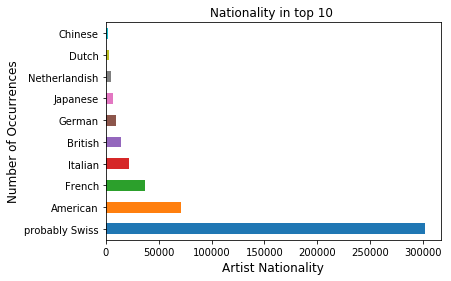

In [102]:
df3['Artist Nationality'].value_counts()[0:10].plot(kind='barh')
plt.title('Nationality in top 10 ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Artist Nationality', fontsize=12)
plt.show()

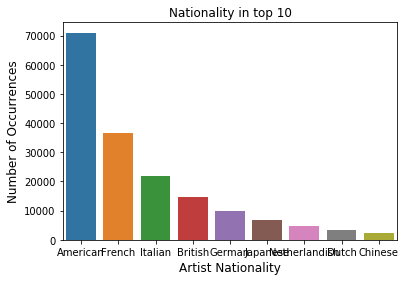

In [103]:
continents = df3['Artist Nationality'].value_counts()[1:10]
sns.barplot(continents.index, continents.values)
plt.title('Nationality in top 10')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Artist Nationality', fontsize=12)
plt.show()

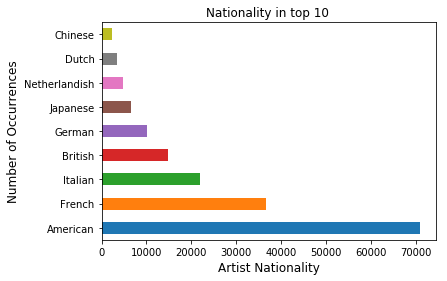

In [104]:
df3['Artist Nationality'].value_counts()[1:10].plot(kind='barh')
plt.title('Nationality in top 10 ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Artist Nationality', fontsize=12)
plt.show()

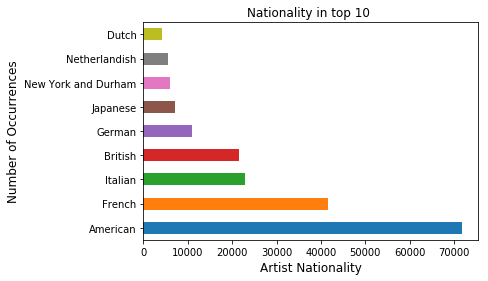

In [105]:
df3['Artist Display Bio'].value_counts()[1:10].plot(kind='barh')
plt.title('Nationality in top 10 ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Artist Nationality', fontsize=12)
plt.show()

In [106]:
df3["Credit lLine"].head()

KeyError: 'Credit lLine'

In [109]:
df3['yearofgift']=df3['Credit Line'].str[-4:]
df3['yearofgift'].head()

0    1979
1    1980
2    1967
3    1967
4    1967
Name: yearofgift, dtype: object

In [110]:
df3['Gift to musum']= df3['Credit Line'].apply(lambda x: x.split(',')[0])
df3['Gift to musum'].head()

0    Gift of Heinz L. Stoppelmann
1    Gift of Heinz L. Stoppelmann
2          Gift of C. Ruxton Love
3          Gift of C. Ruxton Love
4          Gift of C. Ruxton Love
Name: Gift to musum, dtype: object

In [111]:
giftmusum=df3['Gift to musum'].groupby([df3.Date.dt.year]).agg('count')

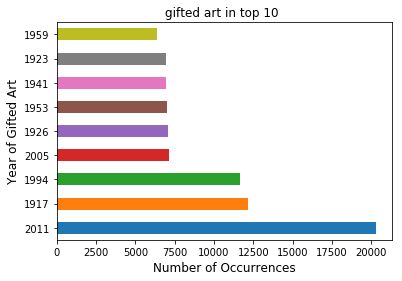

In [112]:
df3['yearofgift'].value_counts()[1:10].plot(kind='barh')
plt.title('gifted art in top 10 ')
plt.ylabel('Year of Gifted Art', fontsize=12)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.show()

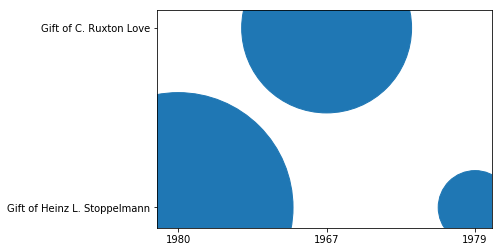

In [113]:
x = df3['yearofgift'][1:10]
y = df3['Gift to musum'][1:10]
z = df3['Gift to musum'].value_counts()[1:10]
plt.scatter(x, y, z)
plt.show()

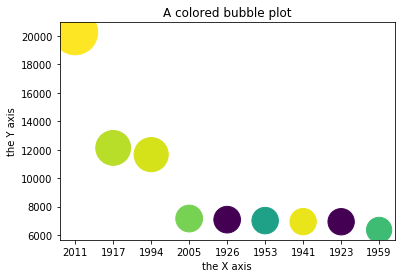

In [136]:
x = df3['yearofgift'].value_counts()[1:10].keys()
y = df3['yearofgift'].value_counts()[1:10]
z= df3['yearofgift'].value_counts()[1:10]
colors = np.random.rand(9)

#plt.scatter(x, y, s=z, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
plt.scatter(x, y, s=z/10, c=colors) 

# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")
 
plt.show()


In [145]:
df3['yearofgift']=pd.to_numeric(df3['yearofgift'])

ValueError: Unable to parse string "sion" at position 238

In [142]:
x = df3['yearofgift'].value_counts()[1:10].keys()
y = df3['Gift to musum'].value_counts()[1:10].keys()
z= df3['yearofgift'].value_counts()[1:10]

sns.catplot(x='yearofgift', y='Gift to musum', kind="bar", data=df3)


ValueError: Neither the `x` nor `y` variable appears to be numeric.

Index(['2011', '1917', '1994', '2005', '1926', '1953', '1941', '1923', '1959'], dtype='object')